## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
masterDf = pd.merge(left=mouse_metadata,right=study_results, how='outer')
print(masterDf.head())
print(f"{masterDf.shape}")

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
(1893, 8)


In [2]:
duplicateRowsDf = masterDf[masterDf[["Mouse ID","Timepoint"]].duplicated(keep='first')]
print(f"{duplicateRowsDf.shape}")

(5, 8)


In [3]:
# check if there is any missing/null value
masterDf.isnull().values.any()

# number of unique mice
nMice = len(masterDf["Mouse ID"].unique())

# drop duplicates
masterDf = masterDf.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
masterDf.head()
# print(f"{masterDf.shape}")

#1893 rows - 5 duplicate rows = 1888 rows (matches!)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [4]:
# unique entries for gender
gender = masterDf["Sex"].unique()

# add two columns to track Male/Female for groupby conditional count later
masterDf["Male"] = masterDf["Sex"].apply(lambda x: 1 if x == "Male" else 0)
masterDf["Female"] = masterDf["Sex"].apply(lambda x: 1 if x == "Female" else 0)
masterDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Male,Female
0,k403,Ramicane,Male,21,16,0,45.000000,0,1,0
1,k403,Ramicane,Male,21,16,5,38.825898,0,1,0
2,k403,Ramicane,Male,21,16,10,35.014271,1,1,0
3,k403,Ramicane,Male,21,16,15,34.223992,1,1,0
4,k403,Ramicane,Male,21,16,20,32.997729,1,1,0


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# at each time point, get mouse and gender count to see alive mouse after each timepoint

# This method: shortesyntax but has two level of colum names
# summaryStatsByTimePoint = masterDf[["Drug Regimen","Timepoint","Tumor Volume (mm3)","Male","Female","Mouse ID"]]\
#                 .groupby(["Drug Regimen","Timepoint"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem'],\
#                                                             "Mouse ID": 'nunique',"Male": 'sum', "Female": 'sum'}).reset_index("Timepoint")

# This method: can generate desired column names while excuting groupby methods
summaryStatsByTimePoint = masterDf[["Drug Regimen","Timepoint","Tumor Volume (mm3)","Male","Female","Mouse ID"]]\
                .groupby(["Drug Regimen","Timepoint"]).agg( Mean_Tumor_Volume=("Tumor Volume (mm3)","mean"),\
                                                Median_Tumor_Volume=("Tumor Volume (mm3)","median"),\
                                                Var_Tumor_Volume=("Tumor Volume (mm3)","var"),\
                                                Std_Tumor_Volume=("Tumor Volume (mm3)","std"),\
                                                Sem_Tumor_Volume=("Tumor Volume (mm3)","sem"),\
                                                Number_of_Mice=("Mouse ID", 'nunique'),\
                                                Number_of_Male =("Male",'sum'),\
                                                Number_of_Female=("Female",'sum')).reset_index("Timepoint").reset_index("Drug Regimen")

summaryStatsByTimePoint.head(10)

,Drug Regimen,Timepoint,Mean_Tumor_Volume,Median_Tumor_Volume,Var_Tumor_Volume,Std_Tumor_Volume,Sem_Tumor_Volume,Number_of_Mice,Number_of_Male,Number_of_Female
0,Capomulin,0,45.000000,45.000000,0.000000,0.000000,0.000000,25,12,13
1,Capomulin,5,44.266086,45.597064,5.030889,2.242964,0.448593,25,12,13
2,Capomulin,10,43.084291,43.421014,12.344133,3.513422,0.702684,25,12,13
3,Capomulin,15,42.064317,42.798160,16.878693,4.108369,0.838617,24,11,13
4,Capomulin,20,40.716325,40.716428,19.035028,4.362915,0.909731,23,10,13
5,Capomulin,25,39.939528,40.224165,17.100444,4.135268,0.881642,22,9,13
6,Capomulin,30,38.769339,39.260371,19.210721,4.383004,0.934460,22,9,13
7,Capomulin,35,37.816839,38.360455,24.358640,4.935447,1.052241,22,9,13
8,Capomulin,40,36.958001,36.843898,31.441568,5.607278,1.223608,21,9,12
9,Capomulin,45,36.236114,37.311846,31.460537,5.608969,1.223977,21,9,12


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# aggregated across all timepoints

summaryStats= masterDf[["Drug Regimen","Tumor Volume (mm3)","Mouse ID"]]\
                .groupby(["Drug Regimen"]).agg( Mean_Tumor_Volume=("Tumor Volume (mm3)","mean"),\
                                                Median_Tumor_Volume=("Tumor Volume (mm3)","median"),\
                                                Var_Tumor_Volume=("Tumor Volume (mm3)","var"),\
                                                Std_Tumor_Volume=("Tumor Volume (mm3)","std"),\
                                                Sem_Tumor_Volume=("Tumor Volume (mm3)","sem"),\
                                                Number_of_Mouse=("Mouse ID", 'nunique')).reset_index("Drug Regimen")
summaryStats


## Bar and Pie Charts

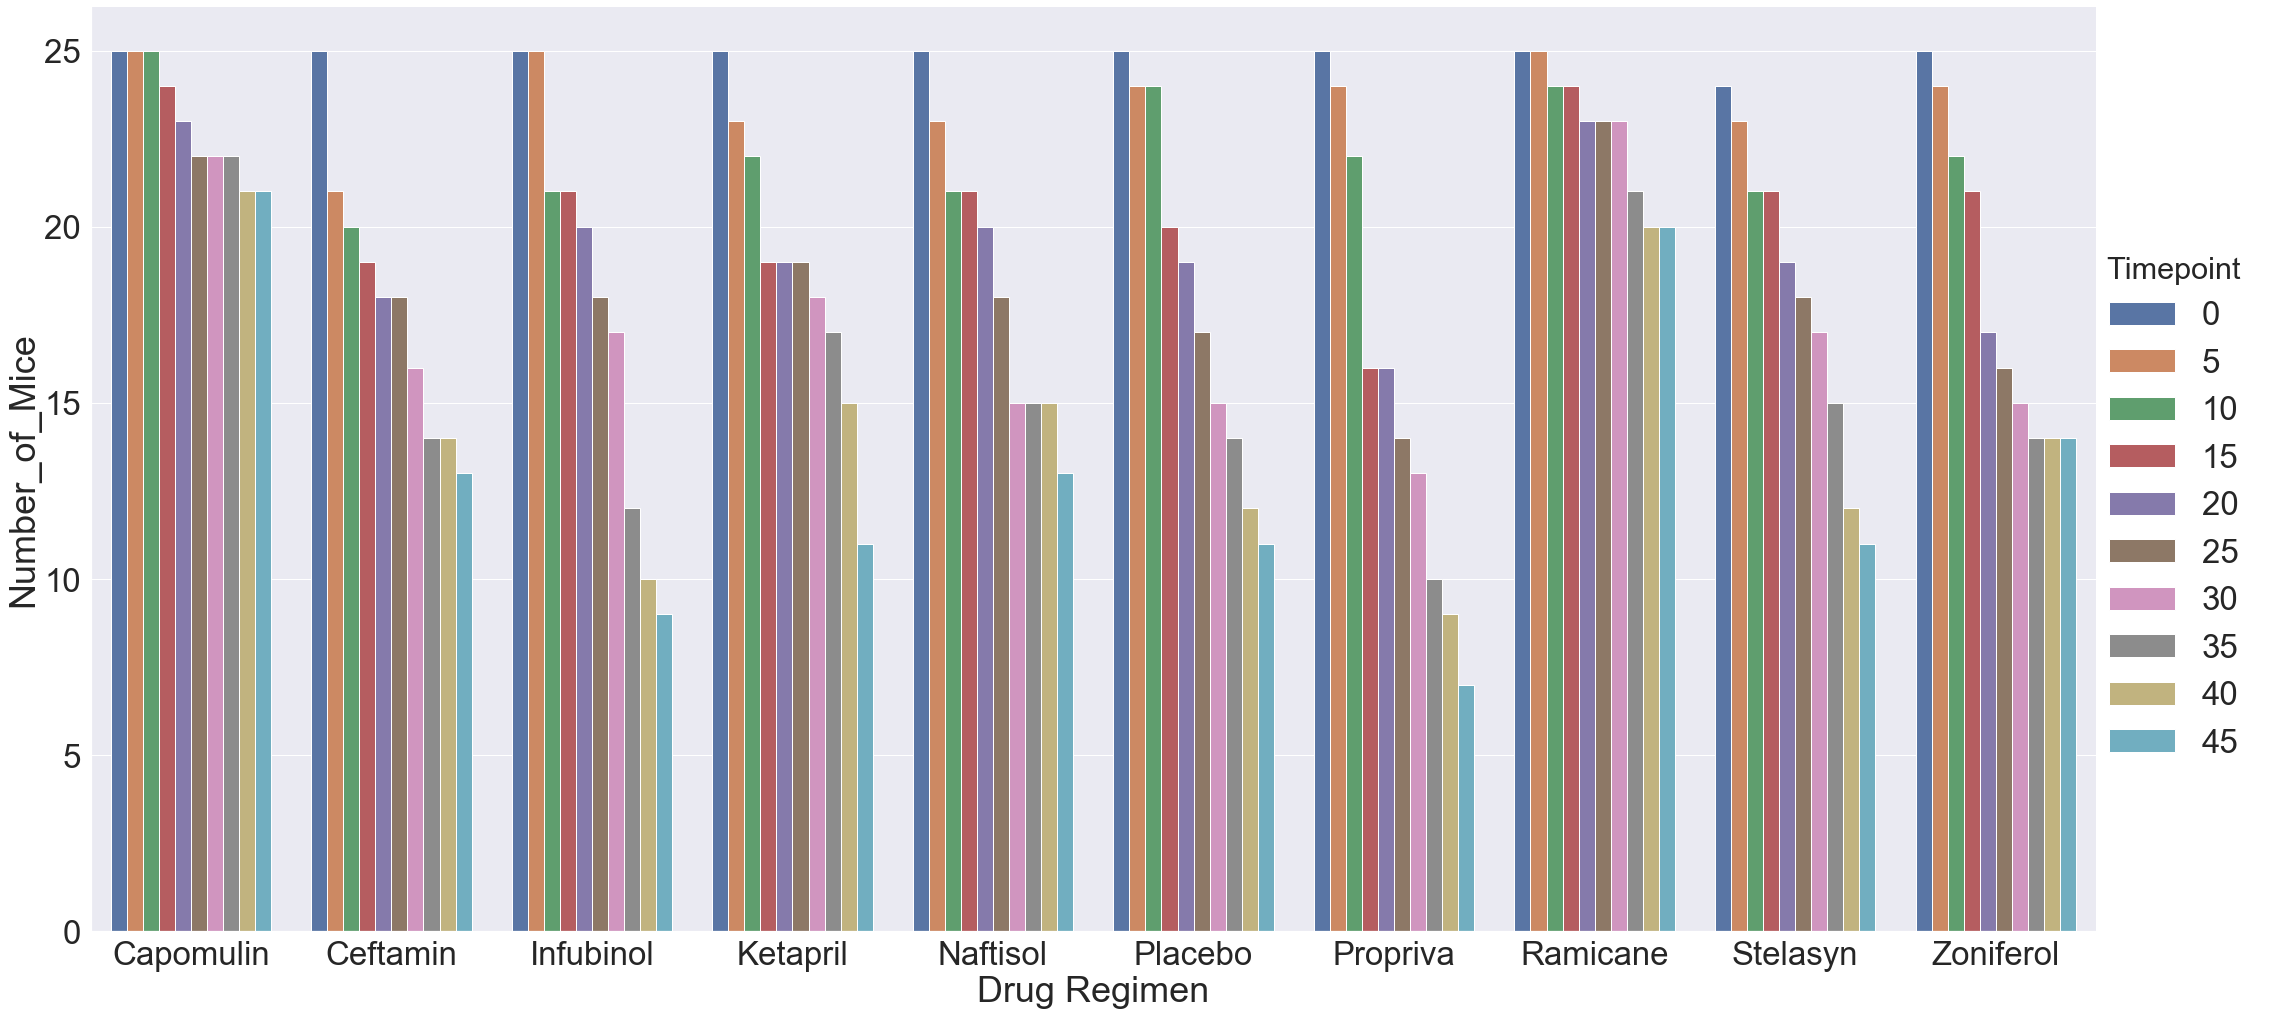

In [22]:
# Use seaborn
# Plot numbers of mice throughout the treatment for each drug regimen
sns.set(font_scale=3)
fig1 = sns.catplot(x = "Drug Regimen",       # x variable name
            y = "Number_of_Mice",       # y variable name
            data = summaryStatsByTimePoint,     # dataframe to plot
            hue = "Timepoint",
            kind = "bar",
            height=15,
            aspect=2)               # size
#  Based on this box plot: Capomulin and Ramicane are least lethal compared to the rest

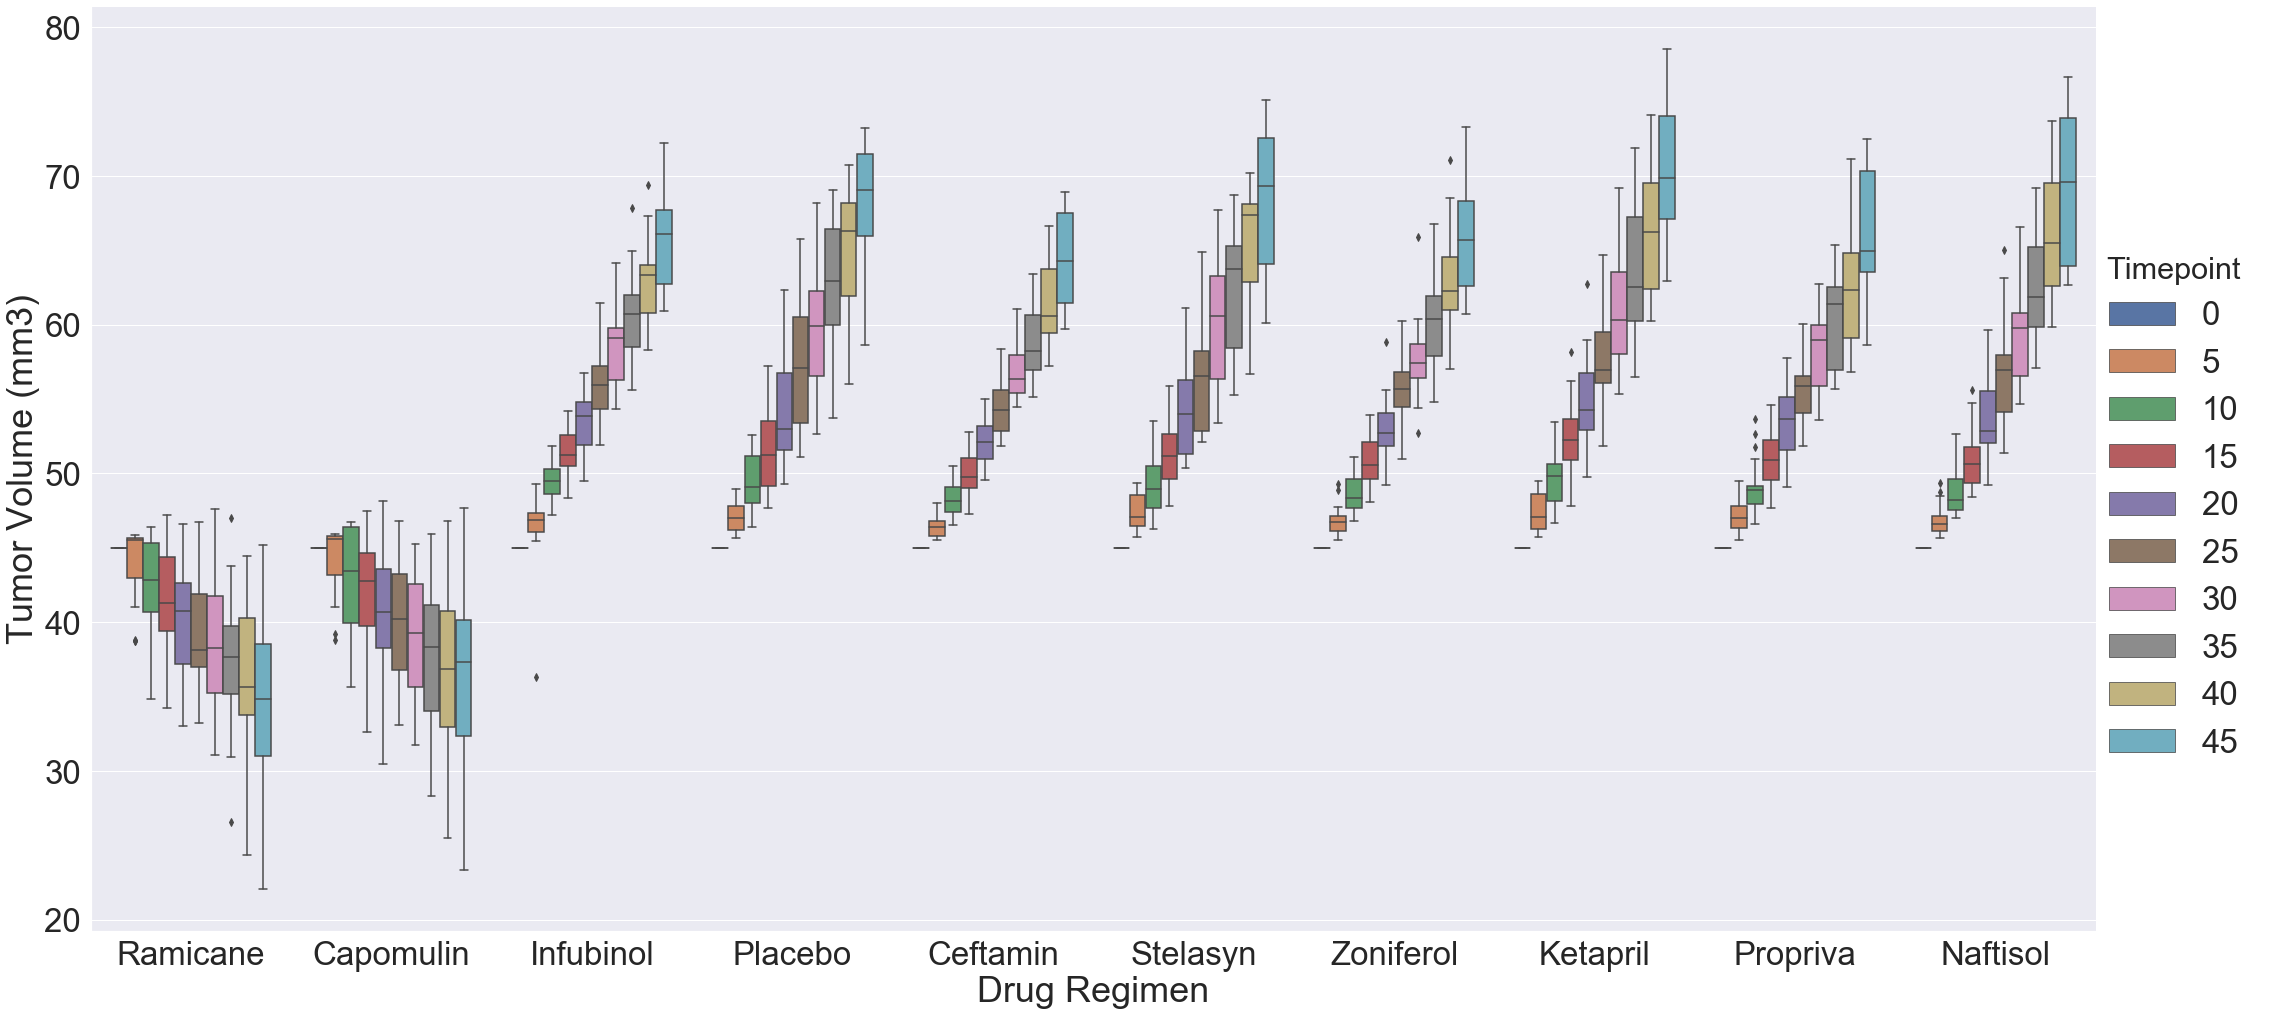

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [53]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib
# aggregate or split by regimen?
genderDf = masterDf[["Mouse ID","Sex"]]
genderDf = genderDf.drop_duplicates(keep='first')
genderStats = genderDf.groupby(["Sex"]).count().reset_index("Sex")
genderStats

,Sex,Mouse ID
0,Female,124
1,Male,125


([<matplotlib.patches.Wedge at 0x1ed3a98ffc8>,
 [Text(-0.7728952440707736, 0.7827087208488094, 'Female'),
  Text(0.8431584480772075, -0.8538640591077923, 'Male')],
 [Text(-0.4215792240386037, 0.42693202955389603, '49.8%'),
  Text(0.49184242804503764, -0.49808736781287877, '50.2%')])

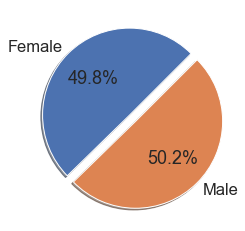

In [50]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sns.set(font_scale=1.5)
fig2, ax2 = plt.subplots()
ax2.pie(genderStats["Mouse ID"], explode=(0, 0.1), labels=genderStats["Sex"], autopct='%.1f%%',
        shadow=True, startangle=45)



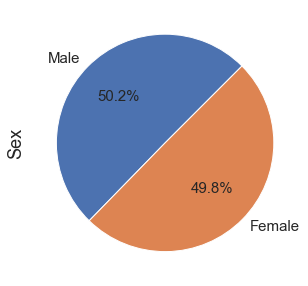

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig3, ax3 = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
genderDf.Sex.value_counts().plot(kind='pie',autopct='%.1f%%',startangle=45,figsize=(5, 5),fontsize=15)

## Quartiles, Outliers and Boxplots

In [80]:
# get max timepoint for each mouse
maxTimepointDf = masterDf[["Mouse ID","Timepoint"]].groupby(["Mouse ID"])\
                    .agg( Max_Timepoint=("Timepoint","max")).reset_index()
newMasterDf = pd.merge(left=masterDf,right=maxTimepointDf, how='outer')

# check to see if join properly
print(f"{newMasterDf.shape}")

(1888, 11)


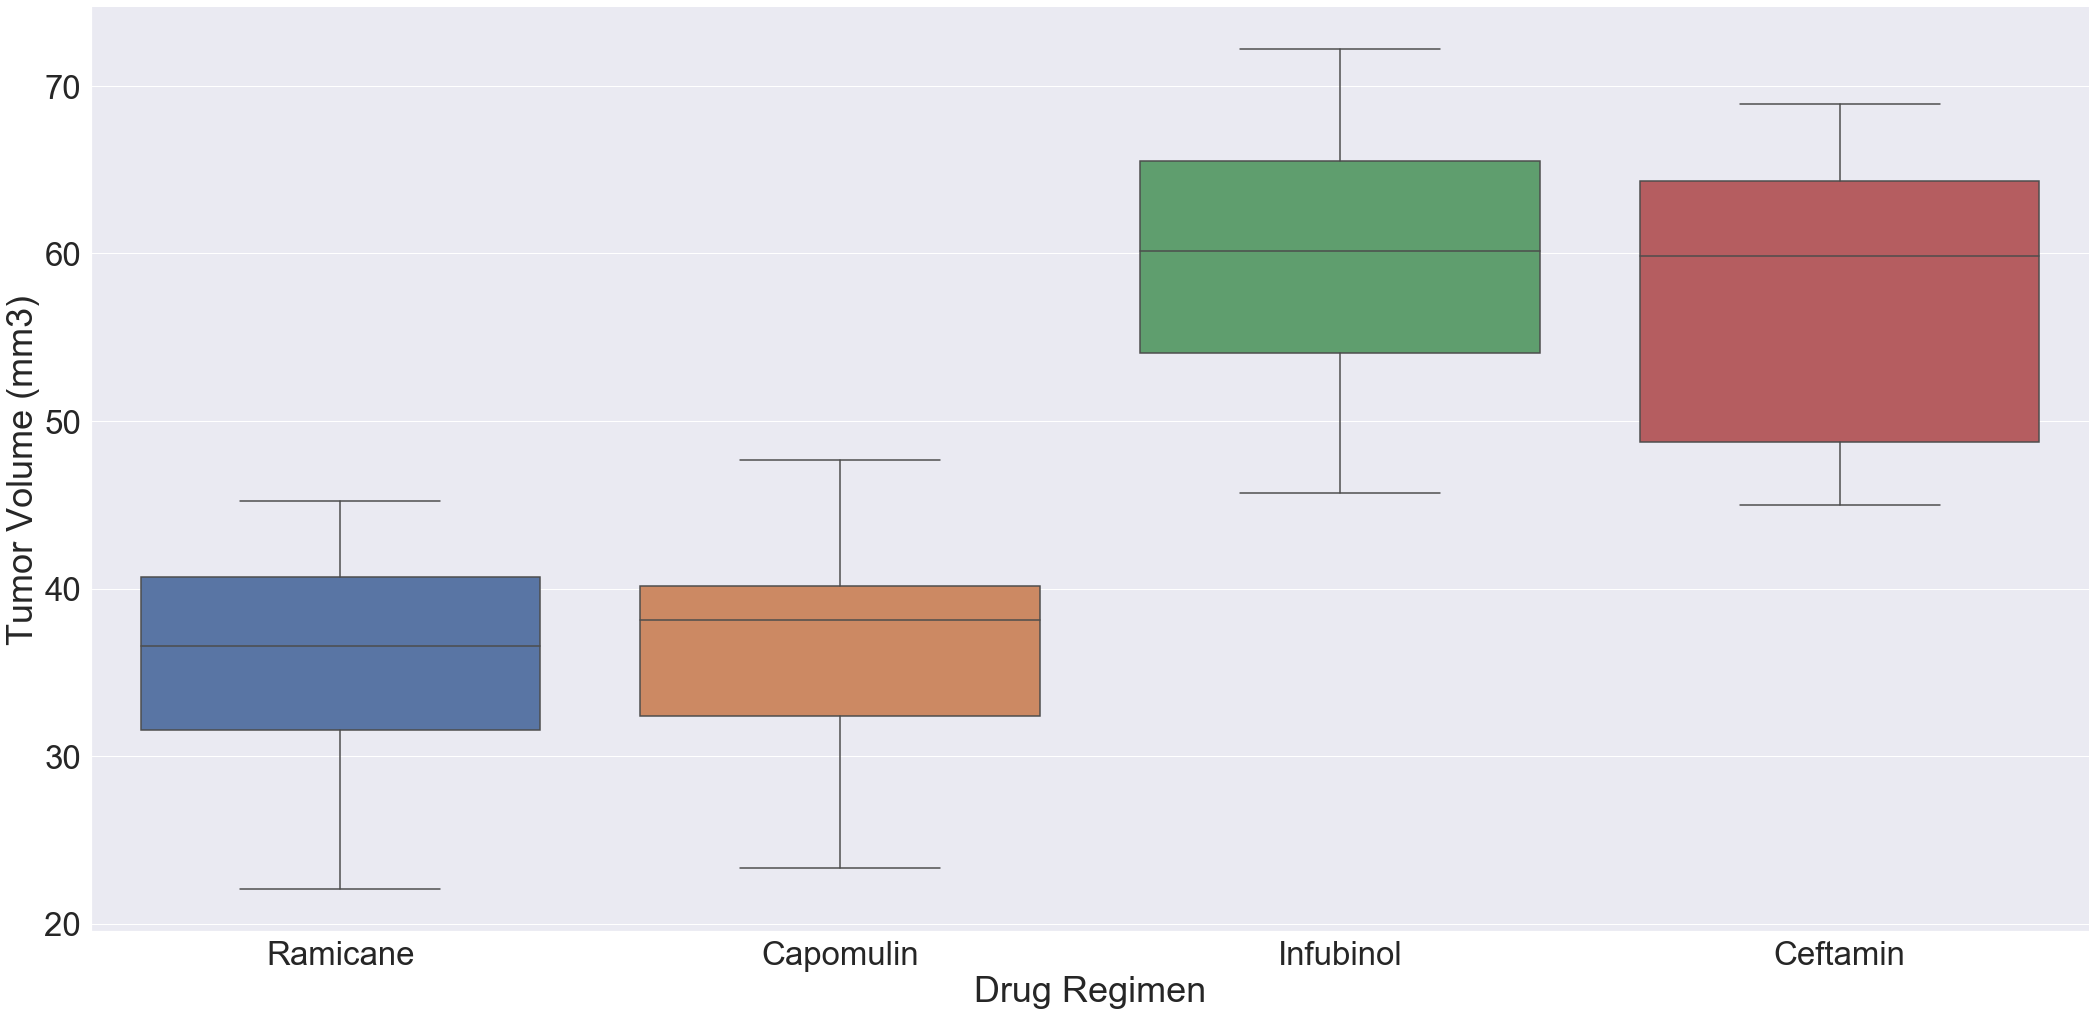

In [105]:

drugList = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
filterDf = newMasterDf[newMasterDf["Drug Regimen"].isin(drugList)]
filterDf = filterDf.loc[filterDf["Timepoint"] == filterDf["Max_Timepoint"],:]

sns.set(font_scale=3)
# flierprops = dict(markerfacecolor='0.75', markersize=5,linestyle='none')
fig4 = sns.catplot(x = "Drug Regimen",       # x variable name
            y = "Tumor Volume (mm3)",       # y variable name
            data = filterDf,               # dataframe to plot
            kind = "box",
            showfliers=False,
#             flierprops=flierprops,
            height=15,
            aspect=2)               # size


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
